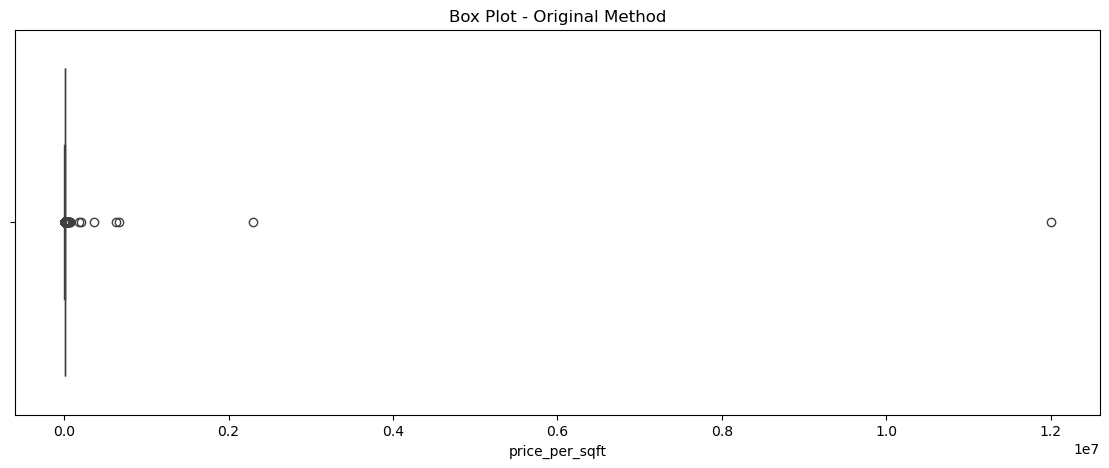

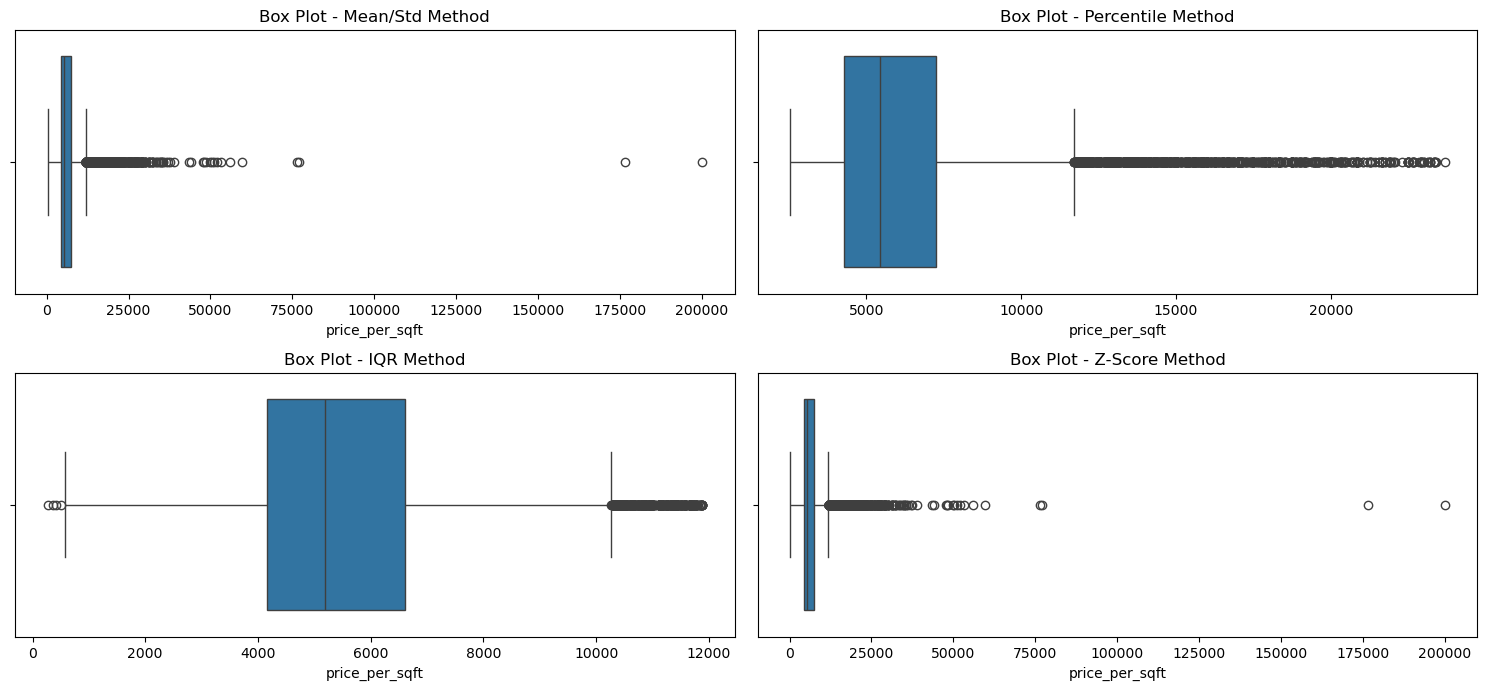

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("house_price.csv")

# Original box plot
plt.figure(figsize=(14, 5))
sns.boxplot(x=df["price_per_sqft"])
plt.title("Box Plot - Original Method")
plt.show()

# Methods to handle outliers
methods = ["Mean/Std", "Percentile", "IQR", "Z-Score"]
#datasets = {"Original": df.copy()}

# Method 1: Mean and Standard Deviation
mean = df["price_per_sqft"].mean()
std_dev = df["price_per_sqft"].std()
lower = mean - 3 * std_dev
upper = mean + 3 * std_dev
datasets["Mean/Std"] = df[(df["price_per_sqft"] >= lower) & (df["price_per_sqft"] <= upper)]

# Method 2: Percentile Method
low_percentile = df["price_per_sqft"].quantile(0.01)
high_percentile = df["price_per_sqft"].quantile(0.99)
datasets["Percentile"] = df[(df["price_per_sqft"] >= low_percentile) & (df["price_per_sqft"] <= high_percentile)]

# Method 3: IQR Method
Q1 = df["price_per_sqft"].quantile(0.25)
Q3 = df["price_per_sqft"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
datasets["IQR"] = df[(df["price_per_sqft"] >= lower_bound) & (df["price_per_sqft"] <= upper_bound)]

# Method 4: Z-Score Method
df["z_score"] = (df["price_per_sqft"] - df["price_per_sqft"].mean()) / df["price_per_sqft"].std()
datasets["Z-Score"] = df[df["z_score"].abs() <= 3]

# Create box plots for each method
plt.figure(figsize=(15, 10))
for idx, method in enumerate(methods):
    plt.subplot(3, 2, idx + 1)
    sns.boxplot(x=datasets[method]["price_per_sqft"])
    plt.title(f"Box Plot - {method} Method")
plt.tight_layout()
plt.show()